In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime
from bs4 import BeautifulSoup as bs,  Tag
from selenium import webdriver
import os
import pandas as pd
from splinter import Browser
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tabpy_client

# Data Cleaning and Preparation Phase 

In [7]:
# Merging Zillow_Zip_National_Data csv files (without repeating header)
Zillow_Zip_National_Data_files = glob.glob("Zillow_Zip_National_Data/*.csv") 
Zillow_Zip_National_Data_df = pd.concat((pd.read_csv(f, header = 0) for f in Zillow_Zip_National_Data_files),sort=False)

In [8]:
# Preview Zillow_Zip_National_Data_df
Zillow_Zip_National_Data_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,Number of Rooms,1996-04,1996-05,1996-06,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,SizeRank
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1.0,109633.0,109841.0,110117.0,...,714453,711526,709841,706911,705322,703016,701573,701153,702156,NaN
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1.0,108499.0,108618.0,108748.0,...,218500,218085,217661,217299,216896,216554,216432,216610,217223,NaN
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,1.0,185436.0,186414.0,187407.0,...,813076,809473,806379,801934,798843,796011,793556,792919,791210,NaN
3,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1.0,125409.0,125377.0,125638.0,...,252940,252872,252673,252164,251368,250443,249475,248970,249002,NaN
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,1.0,68986.0,68114.0,67853.0,...,108806,108967,109456,110017,110627,110565,111047,111172,111867,NaN


In [9]:
# Reset Index
Zillow_Zip_National_Data_df.reset_index(drop=True, inplace=True)


In [10]:
# Preview Columns
Zillow_Zip_National_Data_df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'Number of Rooms', '1996-04', '1996-05', '1996-06',
       ...
       '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
       '2019-12', '2020-01', '2020-02', 'SizeRank'],
      dtype='object', length=295)

In [11]:
# Remove unnecesary Columns
Zillow_Zip_National_Data_df = Zillow_Zip_National_Data_df.drop(Zillow_Zip_National_Data_df.loc[:, '1996-04':'2020-01']
                              .columns, axis = 1)


In [12]:
# Remove 'SizeRank Column'
Zillow_Zip_National_Data_df = Zillow_Zip_National_Data_df.drop(['SizeRank'], axis=1)

In [13]:
Zillow_Zip_National_Data_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,Number of Rooms,2020-02
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1.0,702156
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1.0,217223
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,1.0,791210
3,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1.0,249002
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,1.0,111867


In [14]:
# Rename 'RegionName' Column 
Zillow_Zip_National_Data_df.rename(columns = {'RegionName':'Zip Code'}, inplace = True) 
Zillow_Zip_National_Data_df.head()

,RegionID,Zip Code,City,State,Metro,CountyName,Number of Rooms,2020-02
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1.0,702156
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1.0,217223
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,1.0,791210
3,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1.0,249002
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,1.0,111867


In [15]:
# Rename 'RegionName' Column 
Zillow_Zip_National_Data_df.rename(columns = {'2020-02':'Price (2020-02)'}, inplace = True) 
Zillow_Zip_National_Data_df.head()

,RegionID,Zip Code,City,State,Metro,CountyName,Number of Rooms,Price (2020-02)
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1.0,702156
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1.0,217223
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,1.0,791210
3,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1.0,249002
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,1.0,111867


In [16]:
# Remove not FL rows
Zillow_Zip_National_Data_f_df =  Zillow_Zip_National_Data_df[Zillow_Zip_National_Data_df.State == 'FL']

In [17]:
# Reset Index
Zillow_Zip_National_Data_f_df.reset_index(drop=True, inplace=True)

Zillow_Zip_National_Data_f_df.head()

,RegionID,Zip Code,City,State,Metro,CountyName,Number of Rooms,Price (2020-02)
0,71831,32162,The Villages,FL,The Villages,Sumter County,1.0,160095
1,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,1.0,176727
2,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,1.0,129362
3,72578,33411,Royal Palm Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Palm Beach County,1.0,80242
4,72363,33025,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,1.0,145371


In [18]:
print(Zillow_Zip_National_Data_f_df.dtypes)

RegionID             int64
Zip Code             int64
City                object
State               object
Metro               object
CountyName          object
Number of Rooms    float64
Price (2020-02)      int64
dtype: object


In [19]:
# Initialize  an index list to iterate through URLs 
index_url_list = [1,2,3,4,5,6,7,8,9,10]


In [20]:
# Set increment index variable i to zero
i=0
#j=10
Zip_Atlas_FL_Report_list = []
# Loop through all the download pages
for page in index_url_list:
    zip_atlats_pages = f'http://zipatlas.com/us/fl/zip-code-comparison/median-household-income.{index_url_list[i]}.htm'
    Zip_Atlas_FL_Report = pd.read_html(zip_atlats_pages)[10]
    Zip_Atlas_FL_Report_list.append(Zip_Atlas_FL_Report)
    i+=1
   

In [21]:
# Preview list of dfs
Zip_Atlas_FL_Report_list

[        0         1                      2                         3  \
 0       #  Zip Code               Location                      City   
 1      1.     33945  26.582563, -82.213061         Pineland, Florida   
 2      2.     33921  26.754759, -82.256777      Boca Grande, Florida   
 3      3.     33158  25.635974, -80.307064            Miami, Florida   
 4      4.     33327  26.110800, -80.414644  Fort Lauderdale, Florida   
 ..    ...       ...                    ...                       ...   
 96    96.     32750  28.707950, -81.348035         Longwood, Florida   
 97    97.     32751  28.630332, -81.361802         Maitland, Florida   
 98    98.     34238  27.231817, -82.468637         Sarasota, Florida   
 99    99.     33543  28.204469, -82.330372    Wesley Chapel, Florida   
 100  100.     32224  30.274374, -81.466226     Jacksonville, Florida   
 
               4                   5              6  
 0    Population  Avg. Income/H/hold  National Rank  
 1            

In [22]:
# Concatenate the entire list of dfs
Zip_Atlas_FL_Report_df = pd.concat(Zip_Atlas_FL_Report_list)

# Preview Zip_Atlas_FL_Report_df
Zip_Atlas_FL_Report_df.head(10)

,0,1,2,3,4,5,6
0,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
1,1.,33945,"26.582563, -82.213061","Pineland, Florida",79,"$131,250.00",#49
2,2.,33921,"26.754759, -82.256777","Boca Grande, Florida",1500,"$127,020.00",#65
3,3.,33158,"25.635974, -80.307064","Miami, Florida",6457,"$118,410.00",#98
4,4.,33327,"26.110800, -80.414644","Fort Lauderdale, Florida",13171,"$100,481.00",#256
5,5.,34250,"27.585636, -82.580883","Terra Ceia, Florida",459,"$100,000.00",#276
6,6.,34786,"28.445548, -81.571162","Windermere, Florida",8449,"$99,671.00",#277
7,7.,33332,"26.059091, -80.416122","Fort Lauderdale, Florida",3778,"$99,269.00",#282
8,8.,33146,"25.720850, -80.272571","Miami, Florida",13210,"$96,609.00",#328
9,9.,33076,"26.311845, -80.268010","Pompano Beach, Florida",19710,"$95,989.00",#337


In [23]:
# This calls the first row for the header
new_header = Zip_Atlas_FL_Report_df.iloc[0] 
# take the rest of your data minus the header row
Zip_Atlas_FL_Report_df = Zip_Atlas_FL_Report_df[1:] 
# set the header row as the df header
Zip_Atlas_FL_Report_df.columns = new_header 
# Lets see the 5 first rows of the new dataset
Zip_Atlas_FL_Report_df.head()

,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
1,1.,33945,"26.582563, -82.213061","Pineland, Florida",79,"$131,250.00",#49
2,2.,33921,"26.754759, -82.256777","Boca Grande, Florida",1500,"$127,020.00",#65
3,3.,33158,"25.635974, -80.307064","Miami, Florida",6457,"$118,410.00",#98
4,4.,33327,"26.110800, -80.414644","Fort Lauderdale, Florida",13171,"$100,481.00",#256
5,5.,34250,"27.585636, -82.580883","Terra Ceia, Florida",459,"$100,000.00",#276


In [24]:
# Reset Index
Zip_Atlas_FL_Report_df.reset_index(drop=True, inplace=True)
Zip_Atlas_FL_Report_df.head()

,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
0,1.,33945,"26.582563, -82.213061","Pineland, Florida",79,"$131,250.00",#49
1,2.,33921,"26.754759, -82.256777","Boca Grande, Florida",1500,"$127,020.00",#65
2,3.,33158,"25.635974, -80.307064","Miami, Florida",6457,"$118,410.00",#98
3,4.,33327,"26.110800, -80.414644","Fort Lauderdale, Florida",13171,"$100,481.00",#256
4,5.,34250,"27.585636, -82.580883","Terra Ceia, Florida",459,"$100,000.00",#276


In [25]:
# Create two new columns to separate 'Longitude' & 'Latitud'
# Adding two new columns to the existing dataframe. 
# splitting is done on the basis of coma. 
Zip_Atlas_FL_Report_df[['Latitude','Longitude']] = Zip_Atlas_FL_Report_df['Location'].str.split(",",expand=True)

Zip_Atlas_FL_Report_df.head()

,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank,Latitude,Longitude
0,1.,33945,"26.582563, -82.213061","Pineland, Florida",79,"$131,250.00",#49,26.582563,-82.213061
1,2.,33921,"26.754759, -82.256777","Boca Grande, Florida",1500,"$127,020.00",#65,26.754759,-82.256777
2,3.,33158,"25.635974, -80.307064","Miami, Florida",6457,"$118,410.00",#98,25.635974,-80.307064
3,4.,33327,"26.110800, -80.414644","Fort Lauderdale, Florida",13171,"$100,481.00",#256,26.110800,-80.414644
4,5.,34250,"27.585636, -82.580883","Terra Ceia, Florida",459,"$100,000.00",#276,27.585636,-82.580883


In [26]:
# Remove unnecesary Columns
Zip_Atlas_FL_Report_df = Zip_Atlas_FL_Report_df.drop(['#', 'Location', 'National Rank', 'City'], axis=1)

Zip_Atlas_FL_Report_df.head()


,Zip Code,Population,Avg. Income/H/hold,Latitude,Longitude
0,33945,79,"$131,250.00",26.582563,-82.213061
1,33921,1500,"$127,020.00",26.754759,-82.256777
2,33158,6457,"$118,410.00",25.635974,-80.307064
3,33327,13171,"$100,481.00",26.110800,-80.414644
4,34250,459,"$100,000.00",27.585636,-82.580883


In [27]:
# Remove concatenated header rows
Zip_Atlas_FL_Report_f_df =  Zip_Atlas_FL_Report_df[Zip_Atlas_FL_Report_df['Zip Code'] != 'Zip Code']


In [28]:
# Convert 'Zip Code' str to int
Zip_Atlas_FL_Report_f_df['Zip Code'] = Zip_Atlas_FL_Report_f_df['Zip Code'].astype(int)

In [202]:
# Merge two previous cleaned dfs
ZIP_Zillow_Combined_Report = pd.merge(Zillow_Zip_National_Data_f_df, Zip_Atlas_FL_Report_f_df, on='Zip Code', how='inner')

In [341]:
ZIP_Zillow_Combined_Report.head()

,RegionID,Zip Code,City,State,Metro,CountyName,Number of Rooms,Price (2020-02),Population,Avg. Income/H/hold,Latitude,Longitude
0,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,1.0,176727.0,33833,33784.0,25.937576,-80.136088
1,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,2.0,330307.0,33833,33784.0,25.937576,-80.136088
2,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,1.0,129362.0,22779,41592.0,28.450355,-81.626886
3,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,2.0,174916.0,22779,41592.0,28.450355,-81.626886
4,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,3.0,295144.0,22779,41592.0,28.450355,-81.626886


**Using info and describe to check the data**

In [204]:
ZIP_Zillow_Combined_Report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4223 entries, 0 to 4222
Data columns (total 12 columns):
RegionID              4223 non-null int64
Zip Code              4223 non-null int64
City                  4223 non-null object
State                 4223 non-null object
Metro                 3954 non-null object
CountyName            4223 non-null object
Number of Rooms       3358 non-null float64
Price (2020-02)       4223 non-null int64
Population            4223 non-null object
Avg. Income/H/hold    4223 non-null object
Latitude              4223 non-null object
Longitude             4223 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 428.9+ KB


In [205]:
# Removing '$' dollar sign and convert to float
ZIP_Zillow_Combined_Report['Avg. Income/H/hold'] = ZIP_Zillow_Combined_Report['Avg. Income/H/hold']
                                                  .str.replace(',', '').str.replace('$', '').astype(float)

In [206]:
# Convert srt values to numeric for our analysis
ZIP_Zillow_Combined_Report[['Population', 'Longitude', 'Latitude']] = ZIP_Zillow_Combined_Report[['Population', 'Longitude', 'Latitude']]
                                                                     .apply(pd.to_numeric)

In [207]:
# Convert price 'int' to 'float'
ZIP_Zillow_Combined_Report['Price (2020-02)'] = ZIP_Zillow_Combined_Report['Price (2020-02)'].astype(float)

In [279]:
ZIP_Zillow_Combined_Report.head()

,RegionID,Zip Code,City,State,Metro,CountyName,Number of Rooms,Price (2020-02),Population,Avg. Income/H/hold,Latitude,Longitude
0,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,1.0,176727.0,33833,33784.0,25.937576,-80.136088
1,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,2.0,330307.0,33833,33784.0,25.937576,-80.136088
2,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,1.0,129362.0,22779,41592.0,28.450355,-81.626886
3,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,2.0,174916.0,22779,41592.0,28.450355,-81.626886
4,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,3.0,295144.0,22779,41592.0,28.450355,-81.626886


In [209]:
ZIP_Zillow_Combined_Report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4223 entries, 0 to 4222
Data columns (total 12 columns):
RegionID              4223 non-null int64
Zip Code              4223 non-null int64
City                  4223 non-null object
State                 4223 non-null object
Metro                 3954 non-null object
CountyName            4223 non-null object
Number of Rooms       3358 non-null float64
Price (2020-02)       4223 non-null float64
Population            4223 non-null int64
Avg. Income/H/hold    4223 non-null float64
Latitude              4223 non-null float64
Longitude             4223 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 428.9+ KB


In [210]:
ZIP_Zillow_Combined_Report.describe()

,RegionID,Zip Code,Number of Rooms,Price (2020-02),Population,Avg. Income/H/hold,Latitude,Longitude
count,4223.000000,4223.000000,3358.000000,4.223000e+03,4223.000000,4223.000000,4223.000000,4223.000000
mean,72502.017523,33303.838503,2.769803,3.242969e+05,18622.764622,40176.443524,28.095660,-81.942524
std,444.958573,803.388672,1.458906,4.066245e+05,13224.961530,13939.492023,1.549646,1.601771
min,71734.000000,32008.000000,1.000000,3.093100e+04,0.000000,0.000000,24.576542,-87.473034
25%,72127.000000,32641.000000,2.000000,1.482860e+05,7748.000000,31202.000000,26.727504,-82.511477
50%,72485.000000,33183.000000,3.000000,2.349710e+05,16890.000000,37283.000000,28.058392,-81.748478
75%,72883.000000,33880.000000,3.000000,3.546570e+05,27144.000000,45252.000000,29.233721,-80.621954
max,73256.000000,34997.000000,5.000000,9.505039e+06,74948.000000,127020.000000,30.974169,-80.035737


# Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

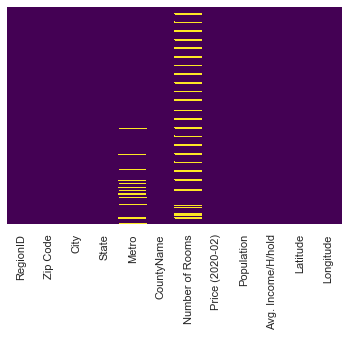

In [211]:
sns.heatmap(ZIP_Zillow_Combined_Report.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Let's see how our data is distributed 

Roughly 20 percent of the Number of Rooms data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.
Looking at the Metro column, it looks like the amount of missing values is not significant or negligible for my analysis 

Let's continue on by visualizing some more of the data! 

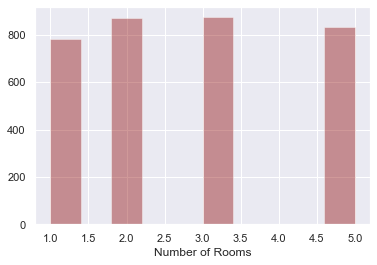

In [212]:
sns.distplot(ZIP_Zillow_Combined_Report['Number of Rooms'].dropna(),kde=False,color='darkred',bins=10)

Text(0, 0.5, 'Frequency')

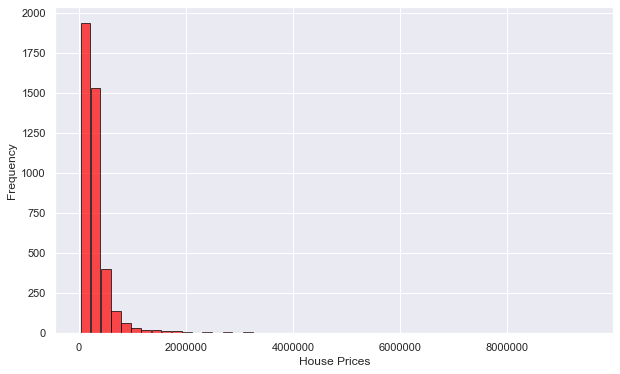

In [213]:
# Create a Histogram Plot using house's price column 
ZIP_Zillow_Combined_Report['Price (2020-02)'].hist(bins=50,color='red',rwidth=0.95, edgecolor='black', alpha=0.7, figsize=(10,6))
plt.xlabel('House Prices')
plt.ylabel('Frequency')

# Let's graph a Nicer Notched Boxplot
Through this detailed graph we can have a better understanding of Outliers

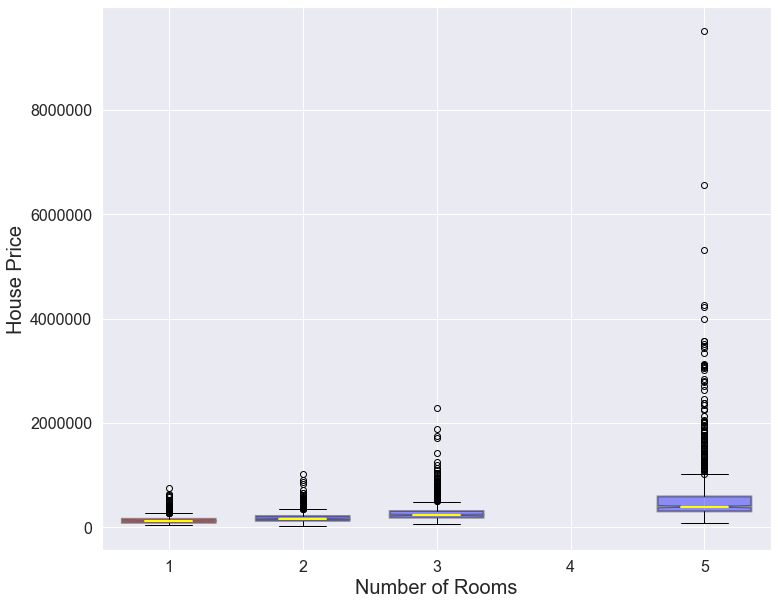

In [214]:
bedrooms_1 = ZIP_Zillow_Combined_Report[ZIP_Zillow_Combined_Report['Number of Rooms']==1.0]['Price (2020-02)']
bedrooms_2 = ZIP_Zillow_Combined_Report[ZIP_Zillow_Combined_Report['Number of Rooms']==2.0]['Price (2020-02)']
bedrooms_3 = ZIP_Zillow_Combined_Report[ZIP_Zillow_Combined_Report['Number of Rooms']==3.0]['Price (2020-02)']
bedrooms_4 = ZIP_Zillow_Combined_Report[ZIP_Zillow_Combined_Report['Number of Rooms']==4.0]['Price (2020-02)']
bedrooms_5 = ZIP_Zillow_Combined_Report[ZIP_Zillow_Combined_Report['Number of Rooms']==5.0]['Price (2020-02)']

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111)
boxplots = ax.boxplot([bedrooms_1, bedrooms_2, bedrooms_3, bedrooms_4, bedrooms_5],
           notch = True,
           labels=['1','2', '3', '4', '5'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')

plt.xlabel('Number of Rooms', fontsize = 20);
plt.ylabel('House Price', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

# Fill in Missing Values
By looking at the sequence of prices by number of rooms and also by checking at Zillow 4 bedrooms data by region and zip code, we recongnize the NaN values correspond to 4.0 (data was probably lose during the merge). Let's fill in these missing values with 4.0

In [215]:
# Replacing NaN values by 4.0 
ZIP_Zillow_Combined_Report['Number of Rooms'] = ZIP_Zillow_Combined_Report['Number of Rooms'].fillna(4.0)


In [216]:
# Check Head
ZIP_Zillow_Combined_Report.head()

,RegionID,Zip Code,City,State,Metro,CountyName,Number of Rooms,Price (2020-02),Population,Avg. Income/H/hold,Latitude,Longitude
0,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,1.0,176727.0,33833,33784.0,25.937576,-80.136088
1,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,2.0,330307.0,33833,33784.0,25.937576,-80.136088
2,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,3.0,939300.0,33833,33784.0,25.937576,-80.136088
3,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,4.0,1961100.0,33833,33784.0,25.937576,-80.136088
4,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,5.0,3058869.0,33833,33784.0,25.937576,-80.136088


# Outliers
As you can aprecite in my previous histogram and boxplot graph for pricing distribution, there are several princing outliers eallocated in each the different room number . Since these outliers can potentially generate a distortion to my analysis, and additionally because these values are considerated rare or not commun for the majority of population consumers, I decided to remove all of them in the following proportion in order to use a more balanced data set:
* number bedrooms (5) : Remove all the prices above $1M

* number bedrooms (4) : Remove all the prices above $700K

* number bedrooms (3) : Remove all the prices above $600K

* nember bedrooms (2) : Remove all the prices above $500K

* number bedrooms (1) : Remove all the prices above $400K


In [233]:
print(ZIP_Zillow_Combined_Report[ZIP_Zillow_Combined_Report['Number of Rooms'] == 4.0].count())

RegionID              788
Zip Code              788
City                  788
State                 788
Metro                 732
CountyName            788
Number of Rooms       788
Price (2020-02)       788
Population            788
Avg. Income/H/hold    788
Latitude              788
Longitude             788
dtype: int64


In [229]:
index_5 = ZIP_Zillow_Combined_Report[ (ZIP_Zillow_Combined_Report['Number of Rooms'] == 5.0)
                                     & (ZIP_Zillow_Combined_Report['Price (2020-02)'] >= 850000.0)].index
index_4 = ZIP_Zillow_Combined_Report[ (ZIP_Zillow_Combined_Report['Number of Rooms'] == 4.0)
                                     & (ZIP_Zillow_Combined_Report['Price (2020-02)'] >= 700000.0)].index
index_3 = ZIP_Zillow_Combined_Report[ (ZIP_Zillow_Combined_Report['Number of Rooms'] == 3.0)
                                     & (ZIP_Zillow_Combined_Report['Price (2020-02)'] >= 600000.0)].index
index_2 = ZIP_Zillow_Combined_Report[ (ZIP_Zillow_Combined_Report['Number of Rooms'] == 2.0)
                                     & (ZIP_Zillow_Combined_Report['Price (2020-02)'] >= 500000.0)].index
index_1 = ZIP_Zillow_Combined_Report[ (ZIP_Zillow_Combined_Report['Number of Rooms'] == 1.0)
                                     & (ZIP_Zillow_Combined_Report['Price (2020-02)'] >= 400000.0)].index
ZIP_Zillow_Combined_Report.drop(index_5, inplace=True)
ZIP_Zillow_Combined_Report.drop(index_4, inplace=True)
ZIP_Zillow_Combined_Report.drop(index_3, inplace=True)
ZIP_Zillow_Combined_Report.drop(index_2, inplace=True)
ZIP_Zillow_Combined_Report.drop(index_1, inplace=True)


In [234]:
# Reset Index after filtering values
ZIP_Zillow_Combined_Report.reset_index(drop=True, inplace=True)

In [235]:
ZIP_Zillow_Combined_Report.head()

,RegionID,Zip Code,City,State,Metro,CountyName,Number of Rooms,Price (2020-02),Population,Avg. Income/H/hold,Latitude,Longitude
0,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,1.0,176727.0,33833,33784.0,25.937576,-80.136088
1,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,2.0,330307.0,33833,33784.0,25.937576,-80.136088
2,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,1.0,129362.0,22779,41592.0,28.450355,-81.626886
3,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,2.0,174916.0,22779,41592.0,28.450355,-81.626886
4,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,3.0,295144.0,22779,41592.0,28.450355,-81.626886


In [352]:
ZIP_Zillow_Combined_Report.to_csv ('zip_zillow_combined_report.csv', index = False, header=True)

In [308]:
ZIP_Zillow_Combined_Report.shape

(3952, 12)

Text(0, 0.5, 'Frequency')

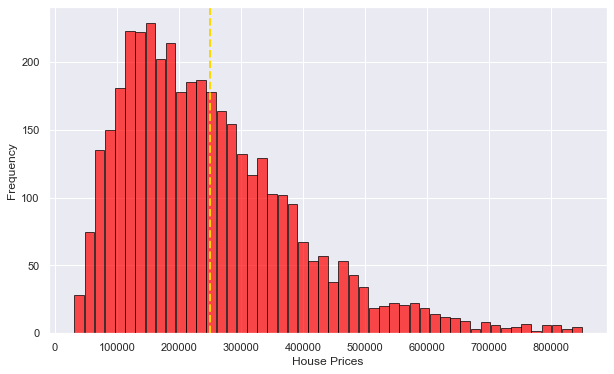

In [238]:
# Let's check again pricing distribution
ZIP_Zillow_Combined_Report['Price (2020-02)'].hist(bins=50,color='red',rwidth=0.95, edgecolor='black', alpha=0.7, figsize=(10,6))
# Plot a vertical line to oindicate 'Average Price'
plt.axvline(ZIP_Zillow_Combined_Report['Price (2020-02)'].mean(), color='gold', linestyle='dashed', linewidth=2)

plt.xlabel('House Prices')
plt.ylabel('Frequency')


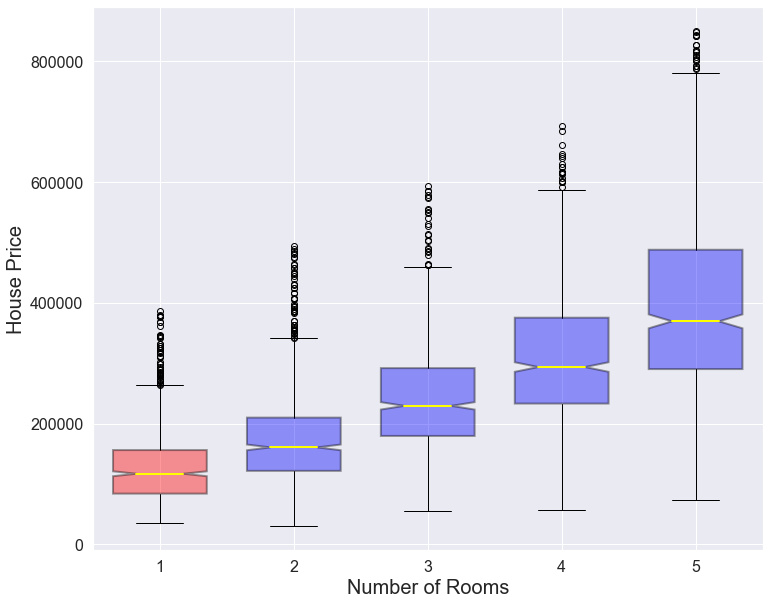

In [239]:
bedrooms_n_1 = ZIP_Zillow_Combined_Report[ZIP_Zillow_Combined_Report['Number of Rooms']==1.0]['Price (2020-02)']
bedrooms_n_2 = ZIP_Zillow_Combined_Report[ZIP_Zillow_Combined_Report['Number of Rooms']==2.0]['Price (2020-02)']
bedrooms_n_3 = ZIP_Zillow_Combined_Report[ZIP_Zillow_Combined_Report['Number of Rooms']==3.0]['Price (2020-02)']
bedrooms_n_4 = ZIP_Zillow_Combined_Report[ZIP_Zillow_Combined_Report['Number of Rooms']==4.0]['Price (2020-02)']
bedrooms_n_5 = ZIP_Zillow_Combined_Report[ZIP_Zillow_Combined_Report['Number of Rooms']==5.0]['Price (2020-02)']

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111)
boxplots = ax.boxplot([bedrooms_n_1, bedrooms_n_2, bedrooms_n_3, bedrooms_n_4, bedrooms_n_5],
           notch = True,
           labels=['1','2', '3', '4', '5'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')

plt.xlabel('Number of Rooms', fontsize = 20);
plt.ylabel('House Price', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

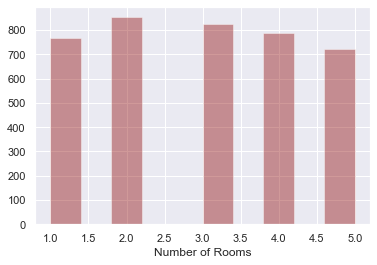

In [240]:
# Let's check again number of rooms distribution
sns.distplot(ZIP_Zillow_Combined_Report['Number of Rooms'].dropna(),kde=False,color='darkred',bins=10)

<Figure size 864x504 with 0 Axes>

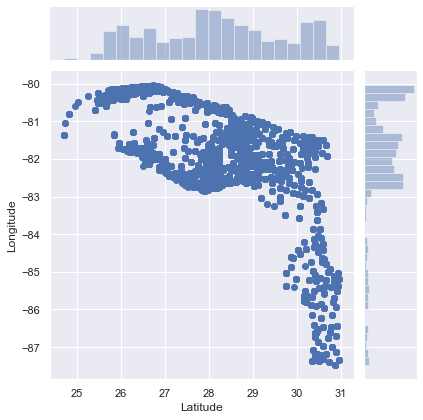

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [250]:
# Check on common location and how the houses are placed
plt.figure(figsize=(12, 7))
sns.jointplot(x='Latitude',y='Longitude',data=ZIP_Zillow_Combined_Report)
plt.show()
sns.despine

<Figure size 864x504 with 0 Axes>

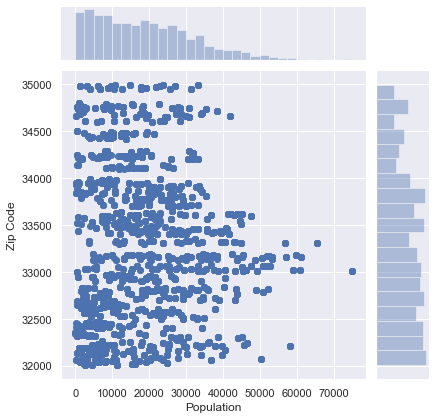

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [249]:
# Let's check population distribution by Zip Code
plt.figure(figsize=(12, 7))
sns.jointplot(x='Population',y='Zip Code',data=ZIP_Zillow_Combined_Report)
plt.show()
sns.despine

<Figure size 864x504 with 0 Axes>

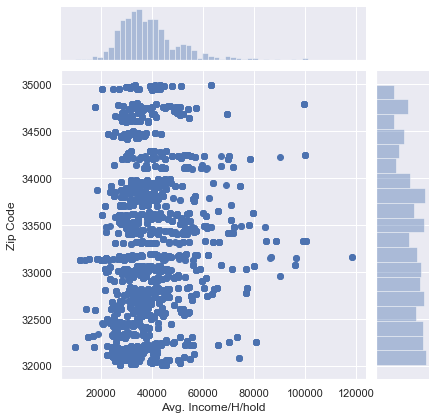

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [252]:
# Let's check Avg. Income/H/hold distribution by Zip Code
plt.figure(figsize=(12, 7))
sns.jointplot(x='Avg. Income/H/hold',y='Zip Code',data=ZIP_Zillow_Combined_Report)
plt.show()
sns.despine

# Check for common factors that might be affecting the price of the house

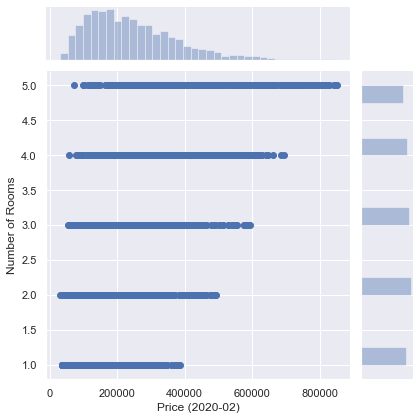

In [253]:
# Create a jointplot showing number of romms versus price
sns.jointplot(x='Price (2020-02)',y='Number of Rooms',data=ZIP_Zillow_Combined_Report)

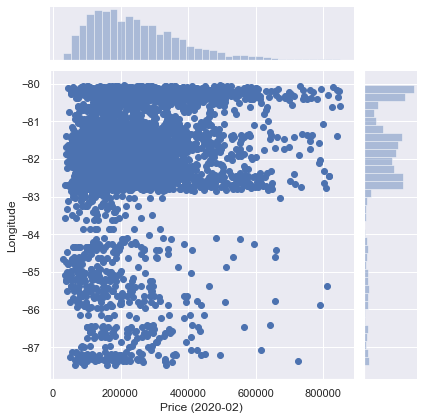

In [254]:
# Create a jointplot showing longitute versus price
sns.jointplot(x='Price (2020-02)',y='Longitude',data=ZIP_Zillow_Combined_Report)

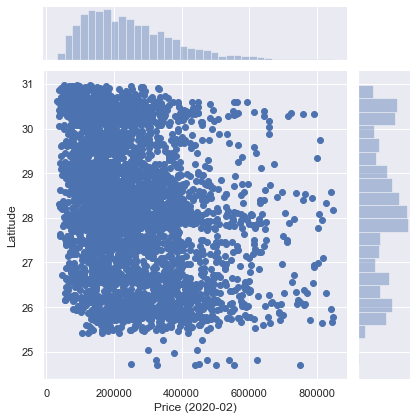

In [255]:
# Create a jointplot showing latitute versus price
sns.jointplot(x='Price (2020-02)',y='Latitude',data=ZIP_Zillow_Combined_Report)

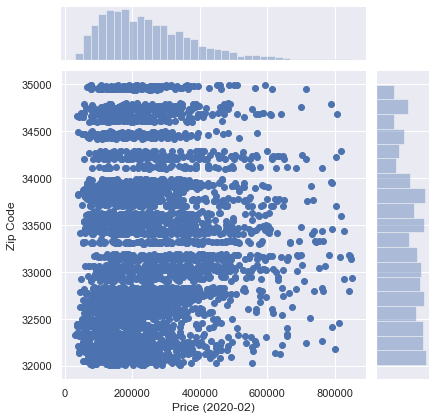

In [256]:
# Create a jointplot showing zip code location versus price
sns.jointplot(x='Price (2020-02)',y='Zip Code',data=ZIP_Zillow_Combined_Report)

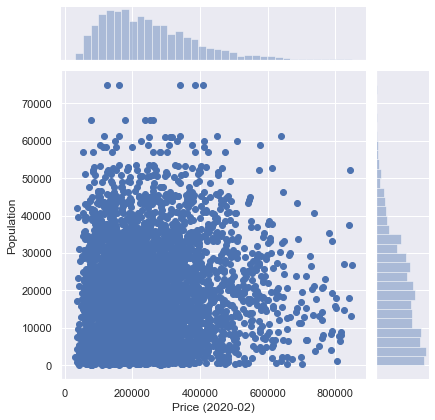

In [257]:
# Create a jointplot showing Population versus price
sns.jointplot(x='Price (2020-02)',y='Population',data=ZIP_Zillow_Combined_Report)

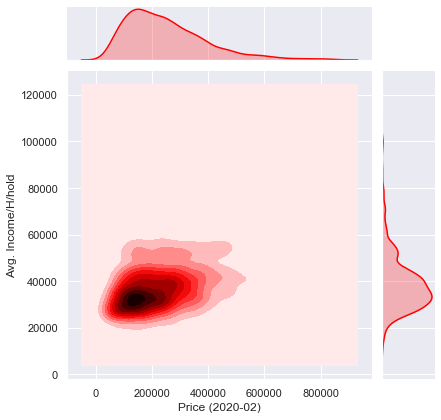

In [258]:
# Create a jointplot showing Avg Area Income versus price
sns.jointplot(x='Price (2020-02)',y='Avg. Income/H/hold',data=ZIP_Zillow_Combined_Report,color='red',kind='kde');

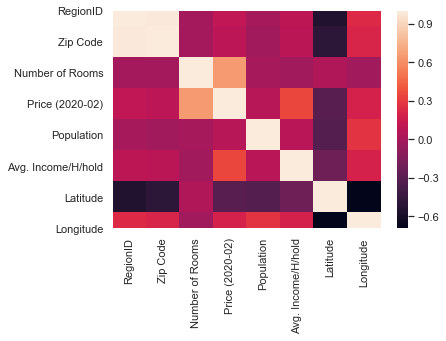

In [259]:
# Create a Corrilation graph including all the features 
sns.heatmap(ZIP_Zillow_Combined_Report.corr())

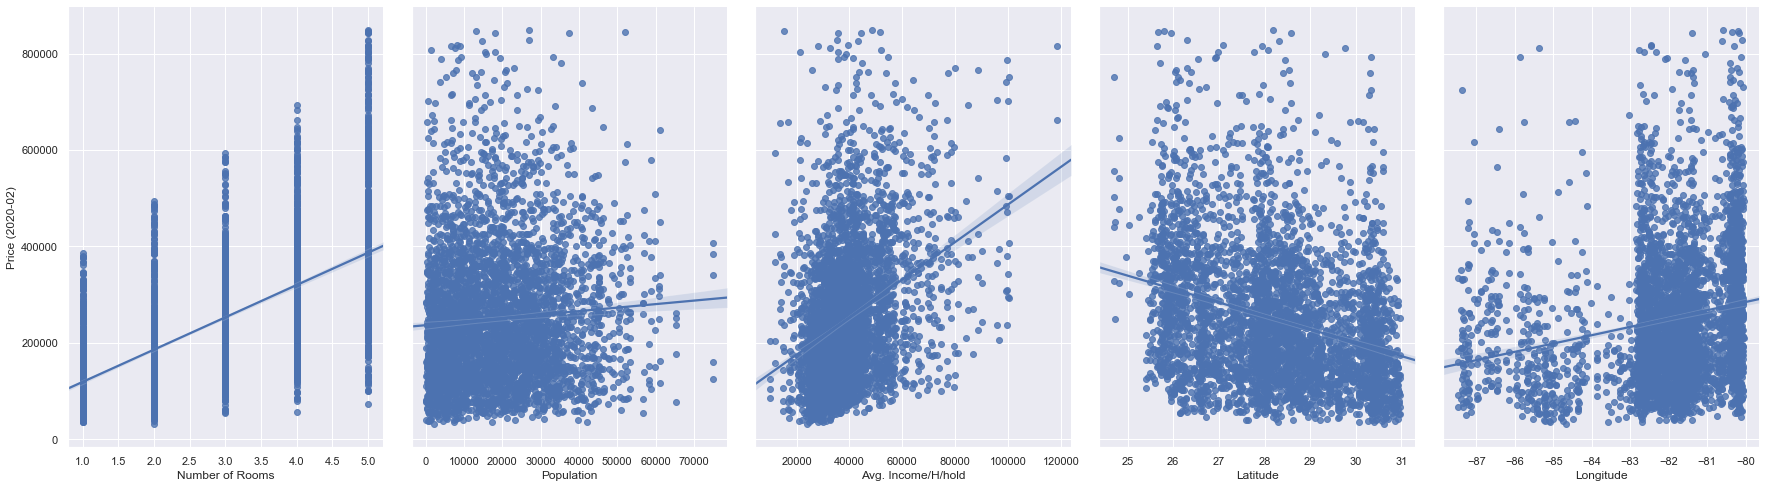

In [288]:
# Create a pairplot to visualize the relationship between the features and the response using scatterplots
sns.pairplot(ZIP_Zillow_Combined_Report, x_vars=['Number of Rooms', 'Population', 'Avg. Income/H/hold', 'Latitude', 'Longitude'], y_vars='Price (2020-02)', size=7, aspect=0.7, kind='reg')

# Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the 'Price (2020-02)' column. We will ignore 
'RegionID', 'Zip Code', 'City', 'State', 'Metro', 'CountyName' columns because it only represents label info that the linear regression model can't use.

# X and y arrays

In [260]:
X = ZIP_Zillow_Combined_Report[['Number of Rooms', 'Population', 'Avg. Income/H/hold', 'Latitude', 'Longitude']]
y = ZIP_Zillow_Combined_Report['Price (2020-02)']

# Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Lets's Create and Test the Model

In [301]:
from sklearn.linear_model import LinearRegression

In [302]:
# We initialize Linear Regression to a variable 'lm'
lm = LinearRegression()

In [303]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [315]:
# print the intercept
print(lm.intercept_)
# print the score 
lm.score(X_test,y_test)

327052.94509831385


0.6191791659320502

In [268]:
coefficient_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coefficient_df

,Coefficient
Number of Rooms,69058.258783
Population,-0.376599
Avg. Income/H/hold,3.452932
Latitude,-28143.658643
Longitude,-4666.783391


Interpreting the coefficients:
The coefficient value signifies how much the mean of the dependent variable (in this case the house's price) changes given a one-unit shift in the independent variable while holding other variables in the model constant.

* Holding all other features fixed, a 1 unit increase in Number of Rooms is associated with an *increase of $69058.258783 *.

* Holding all other features fixed, a 1 unit increase in Population	is associated with a *decrease of $-0.376599 *.

* Holding all other features fixed, a 1 unit increase in Avg. Income/H/hold is associated with an *increase of $3.452932 *.

* Holding all other features fixed, a 1 unit increase in Latitude is associated with a *decrease of $-28143.658643 *.

* Holding all other features fixed, a 1 unit increase in Longitude is associated with a *decrease of $-4666.783391 *.


# Making Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [269]:
predictions = lm.predict(X_test)

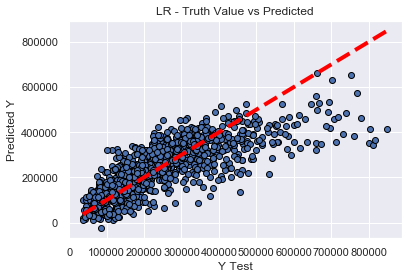

In [333]:
# Plot Truth Values versus Predicted
fig, ax = plt.subplots()
plt.scatter(y_test,predictions,edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='red')
ax.set_xlabel('Y Test')
ax.set_ylabel('Predicted Y')
ax.set_title("LR - Truth Value vs Predicted")
plt.show()

# Residual Histogram

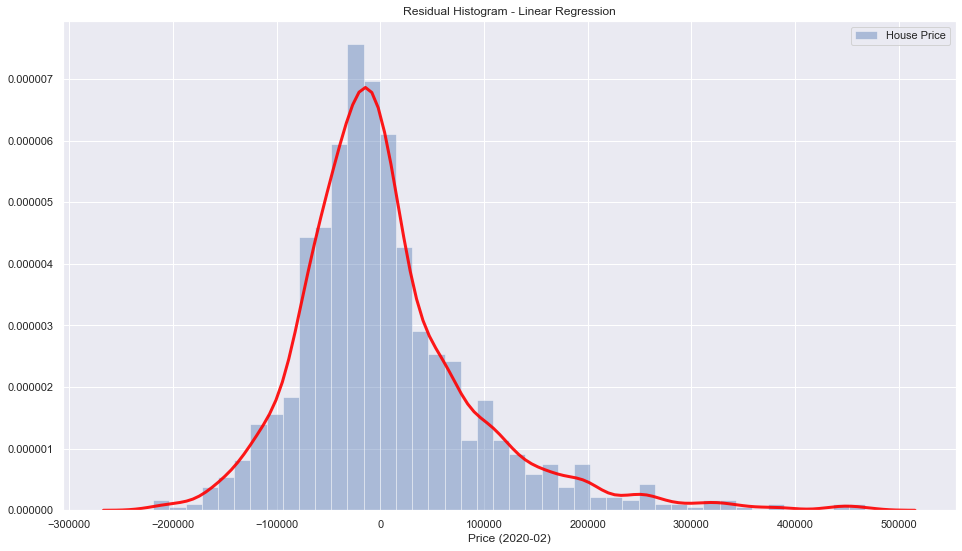

In [340]:
plt.figure(figsize=(16,9)) # figure ration 16:9
sns.set() # for style
 
sns.distplot((y_test-predictions),label="House Price", kde_kws = {'color':'red', 'linewidth':3, 'alpha':0.9})
 
plt.title("Residual Histogram - Linear Regression") # for histogram title
plt.legend() # for label

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [289]:
from sklearn import metrics

In [297]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 61105.38155008398
MSE: 7618429004.514746
RMSE: 87283.61246256222


# Training a Different Model - Gradient Boosting Regression

After fitting our data using the previous linear regression model we can check the score of our data ie , prediction. in this case the prediction was 62% which is low and cosequently our mean errors values were high too. We are going to use a different method 'Gradient Boosting' , which is very important for weak prediction models such as this.

It is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [310]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [311]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Model Evaluation


In [314]:
clf.score(X_test,y_test)

0.8199451339975892

# Making Predictions from our Model

In [323]:
predictions_2 = clf.predict(X_test)

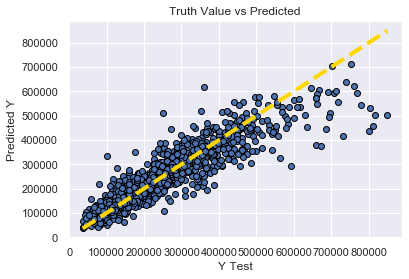

In [332]:
# Plot Truth Values versus Predicted
fig, ax = plt.subplots()
plt.scatter(y_test,predictions_2,edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='gold')
ax.set_xlabel('Y Test')
ax.set_ylabel('Predicted Y')
ax.set_title("GBR - Truth Value vs Predicted")
plt.show()

# Residual Histogram

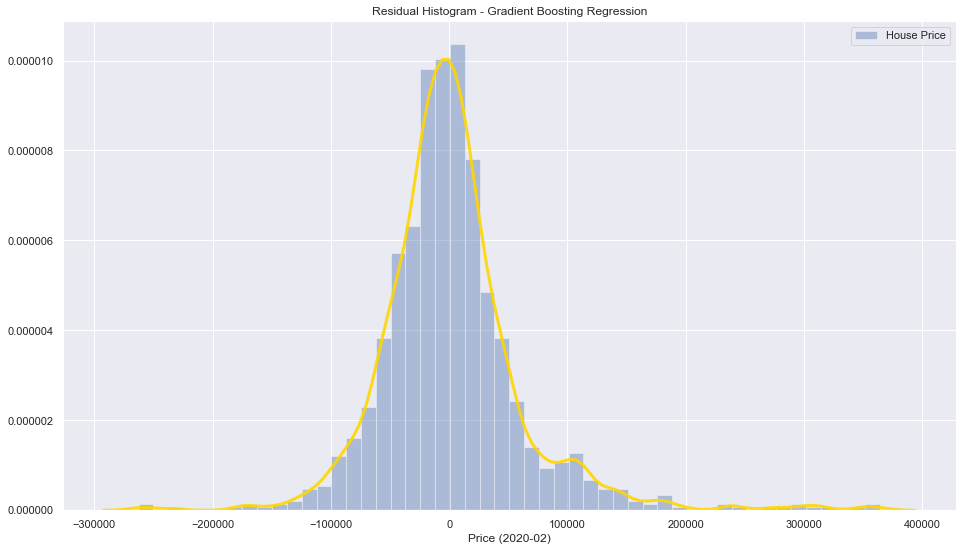

In [334]:
plt.figure(figsize=(16,9))
sns.set() # for style
 
sns.distplot((y_test-predictions_2),label="House Price", kde_kws = {'color':'gold', 'linewidth':3, 'alpha':0.9})
 
plt.title("Residual Histogram - Gradient Boosting Regression")
plt.legend() # for label

# Regression Evaluation Metrics

In [326]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_2))
print('MSE:', metrics.mean_squared_error(y_test, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_2)))


MAE: 40191.636057350726
MSE: 3602048761.1032968
RMSE: 60017.07058082139


# Let's compare results from both models 

In [350]:
comp_dict = {'ML- Model': ['Linear Regression', 'Gradient Boosting Regresssion'], 'Score': ['62%','82%'], 'MAE': ['61105.38', '40191.64'], 'MSE': ['7618429004.51', '3602048761.10'], 'RMSE':['87283.61','60017.07']}

In [351]:
Comparison_df = pd.DataFrame(comp_dict)
Comparison_df

,ML- Model,Score,MAE,MSE,RMSE
0,Linear Regression,62%,61105.38,7618429004.51,87283.61
1,Gradient Boosting Regresssion,82%,40191.64,3602048761.10,60017.07


In [441]:
num_rooms = 3.0
population = 46392
avg_income = 45761.0
latitude = 25.98821
longitude = -80.281374

actual_sales_price=349900.00
predicted_sales_price=0.0

house_features=[num_rooms, population, avg_income, latitude, longitude]

def predict_house_price(house):
    predicted_sales_price = clf.predict(np.array(house).reshape(1, 5))
    return predicted_sales_price;



In [442]:
print(f'Actual Sales Price: ${"{:.2f}".format(actual_sales_price)}')
print(f'Predicted Sales Price: ${"{:.2f}".format(predict_house_price(house_features)[0])}')


Actual Sales Price: $349900.00
Predicted Sales Price: $303540.57
